In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt

from popularity import PopularityRecommender
from content import ContentFiltering
from main import rec_dict, rec_args, debug_opt

### Set up recommender system
This cell contains everything needed for setup.
### A few details on the available debugging options
'measure': 

In [2]:
# Set up the following
RECSYS_TYPE = 'content' # choose from supported (see rec_dict in main.py)
NUM_USERS = 1000
NUM_ITEMS_PER_ITER = 10  # num items presented to each user at each iteration
STARTUP_TIMESTEPS = 10  # num iterations of 'exploration'
RUN_TIMESTEPS = 90  # total num iterations
NUM_ITEMS = round((STARTUP_TIMESTEPS + RUN_TIMESTEPS) * NUM_ITEMS_PER_ITER * np.random.uniform(1, 5))  # total num items in simulation

# Set up additional arguments (see rec_args[RECSYS_TYPE] in main.py for supported arguments)
# A: number of attributes; items_representation: attributes of each item
rec_args['content']['A'] = 100
rec_args['content']['items_representation'] = np.zeros((NUM_ITEMS, rec_args['content']['A']))
# Set up debug options (see debug_opt in main.py)
debug_opt['measurements'] = False # debug measurement of equilibrium
debug_opt['preferences'] = True  # debug user preferences

# For content filtering, generate array of attributes
for i, row in enumerate(rec_args['content']['items_representation']):
    A = rec_args['content']['A']
    n_indices = np.random.randint(1, A)
    indices = np.random.randint(A, size=(n_indices))
    row[indices] = 1
    rec_args['content']['items_representation'][i,:] = row
# Add it to args
rec_args['content']['items_representation'] = rec_args['content']['items_representation'].T

# Check RECSYS_TYPE
if RECSYS_TYPE not in rec_dict:
    raise ValueError("Recommender system type not supported. Supported types: " + ', '.join(rec_dict))

### Instantiate and run

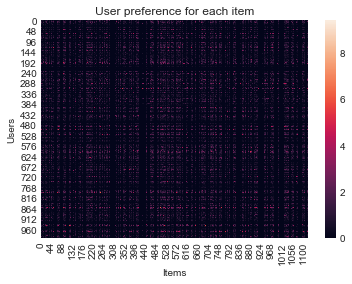

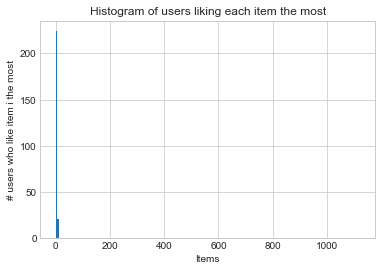

Num items: 1123 
Users: 1000 
Items per iter: 10
Recommender system: content


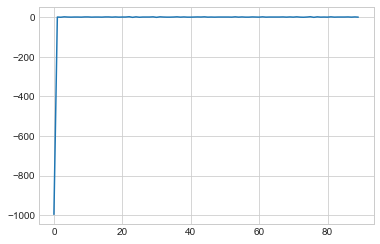

In [3]:
# Create recsys instance
if rec_args[RECSYS_TYPE] is None:
    rec = rec_dict[RECSYS_TYPE](NUM_USERS, NUM_ITEMS, num_startup_iter=STARTUP_TIMESTEPS,
        num_items_per_iter=NUM_ITEMS_PER_ITER, randomize_recommended=True, user_preferences=True,
        debug_user_preferences=debug_opt['preferences'])
else:
    rec = rec_dict[RECSYS_TYPE](NUM_USERS, NUM_ITEMS, num_startup_iter=STARTUP_TIMESTEPS,
        num_items_per_iter=NUM_ITEMS_PER_ITER, randomize_recommended=True, user_preferences=True, 
        debug_user_preferences=debug_opt['preferences'], **rec_args[RECSYS_TYPE])

print('Num items:', NUM_ITEMS, '\nUsers:', NUM_USERS, '\nItems per iter:', NUM_ITEMS_PER_ITER)
print('Recommender system:', RECSYS_TYPE)

# Startup
rec.startup_and_train(timesteps=STARTUP_TIMESTEPS, debug=debug_opt['measurements'])

# Runtime
rec.run(timesteps=RUN_TIMESTEPS - STARTUP_TIMESTEPS, debug=debug_opt['measurements'], train=True)

delta_t = rec.get_heterogeneity()
plt.style.use('seaborn-whitegrid')
plt.plot(np.arange(len(delta_t)), delta_t)
plt.show()